In [62]:
#%% Importing modules and data
import smtplib
import pandas as pd
import numpy as np
import datetime as dt
import pandas.stats.moments as st
from pandas import ExcelWriter
import matplotlib.pyplot as plt
import os
import quandl
import seaborn as sns
import matplotlib.dates as dates
import matplotlib.ticker as ticker
import io
from pandas_datareader import data

%matplotlib inline

def save_xls(list_dfs, xls_path,sheet_names):
    writer = ExcelWriter(xls_path)
    for n, df in enumerate(list_dfs):
        df.to_excel(writer, sheet_names[n])
    writer.save()
    return



In [93]:
'''
List of Quandl Div Stocks

V DE PG KO GS WMT MRK VZ UTX TRV DIS
BA HD MMM PFE NKE MCD JPM INTC GE CSCO
CVX CAT AXP JNJ MSFT IBM AAPL
'''
def div_check(ticker, days_to_ex):
    tick = 'EOD/' + ticker
    df = quandl.get(tick, authtoken="-ZxrLoLy3vKgLtLraaMn")[['Dividend','Adj_Close','Adj_Open']]
    df['return'] = df['Adj_Close'].pct_change(days_to_ex - 1)
    df = df[df['Dividend'] != 0]
    df['return'].hist(bins = 20, figsize = (20,10))
    return df

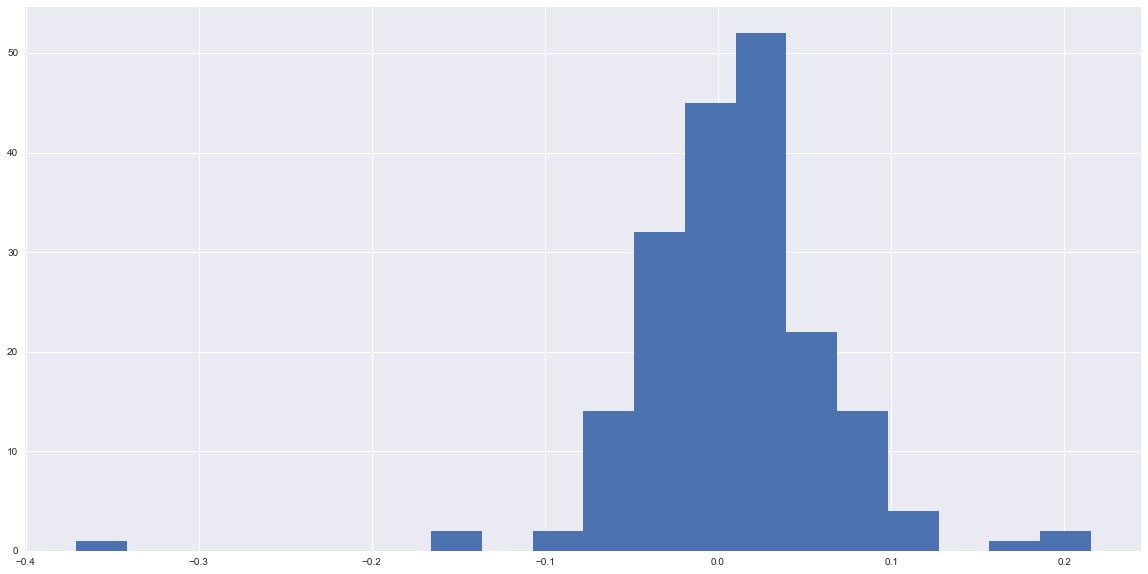

In [94]:
pg = div_check('PG', 17)